# Image processing reprise


In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Digital images

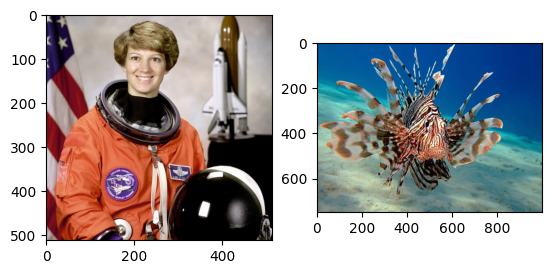

In [ ]:
from skimage import data
from skimage.io import imread
import matplotlib.pyplot as plt

astro = data.astronaut() # scikit-image comes already with some images (try to use the <TAB> key on data.)
fish = imread('lionfish.jpg') # or you can load a custom one

plt.subplot(1,2,1)
plt.imshow(astro)

plt.subplot(1,2,2)
plt.imshow(fish);

In [6]:
print("image data type is: {}".format(type(fish)))
print("image shape is: {}".format(fish.shape))

image data type is: <class 'numpy.ndarray'>
image shape is: (749, 1000, 3)


In [8]:
R = astro[:,:,0]
G = astro[:,:,1]
B = astro[:,:,2]
print("R shape is: {}".format(R.shape))
print("G shape is: {}".format(G.shape))
print("B shape is: {}".format(B.shape))

R shape is: (512, 512)
G shape is: (512, 512)
B shape is: (512, 512)


In [9]:
print(R[:3,:5])

[[154 109  63  54  76]
 [177 144 113 106 128]
 [201 182 168 159 167]]


In [ ]:
print("Max value for the red channel: {}".format(np.max(R)))
print("Min value for the red channel: {}".format(np.min(R)))

Max value for the red channel: 255
Min value for the red channel: 0


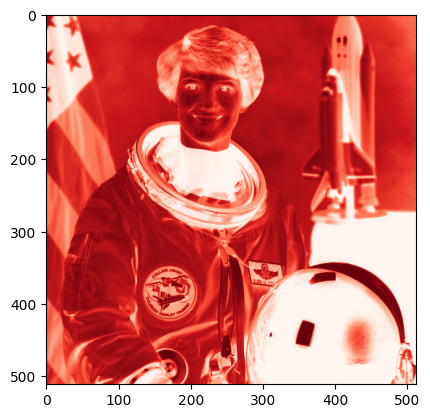

In [15]:
def my_uint2float(img):
    return (img - np.min(img)) / (np.max(img) - np.min(img))
plt.imshow(my_uint2float(R), cmap='Reds');

In [21]:
import skimage
skimage.img_as_float

<function skimage.util.dtype.img_as_float(image, force_copy=False)>

applying the function on the three channels.

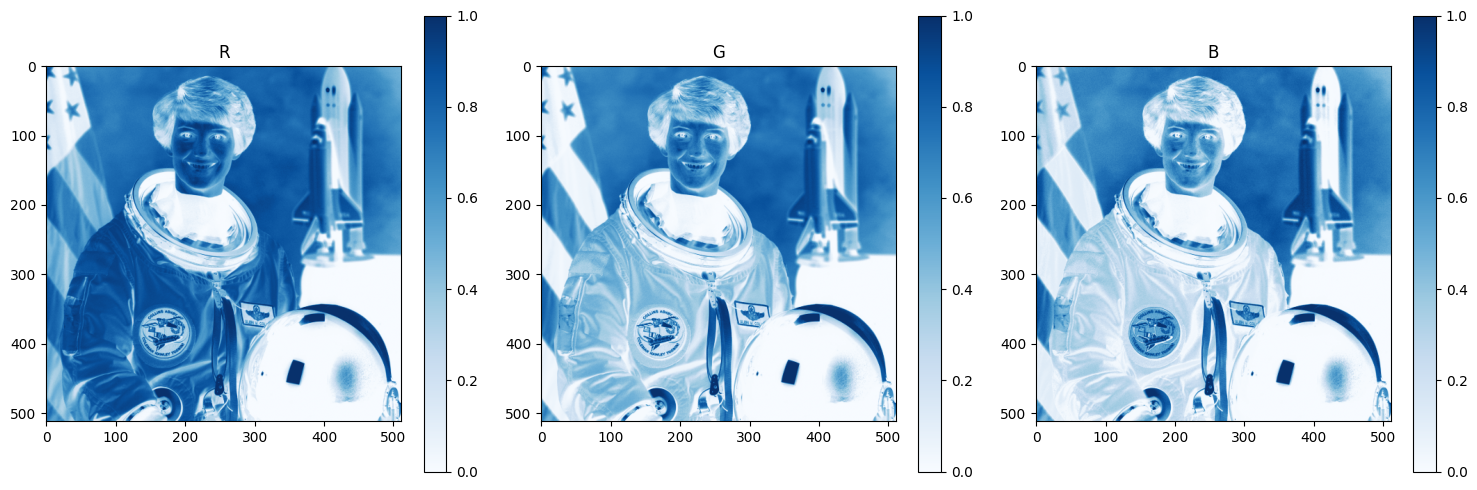

In [22]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(my_uint2float(R), cmap='Blues');
plt.colorbar(orientation='vertical')
plt.title('R')

plt.subplot(1,3,2)
plt.imshow(my_uint2float(G), cmap='Blues');
plt.title('G')
plt.colorbar(orientation='vertical')

plt.subplot(1,3,3)
plt.imshow(my_uint2float(B), cmap='Blues');
plt.title('B')
plt.colorbar(orientation='vertical')

plt.tight_layout() # a handy command that increases spacing between subplots

We know that it's possible to encode a color image in grayscale using the following linear transformation:

$Y = 0.2125 \cdot R + 0.7154 \cdot G + 0.0721 \cdot B$

*The coefficients represent the measured intensity perception of typical trichromat humans, depending on the primaries being used; in particular, human vision is most sensitive to green and least sensitive to blue.*

In [23]:
def my_rgb2gray(img):
    return 0.2125 * my_uint2float(img[:,:,0]) + 0.7154 * my_uint2float(img[:,:,1]) + 0.0721 * my_uint2float(img[:,:,2])

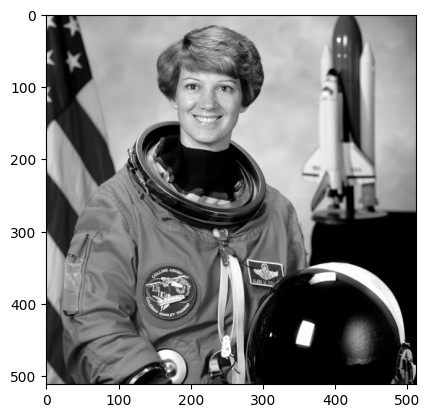

In [25]:
plt.imshow(my_rgb2gray(astro), cmap='gray');

In [27]:
from skimage import color
color.rgb2gray(astro)

array([[5.83434902e-01, 4.14859216e-01, 2.44058431e-01, ...,
        4.75007843e-01, 4.58213333e-01, 4.69121961e-01],
       [6.75588235e-01, 5.56006667e-01, 4.49052941e-01, ...,
        4.68548627e-01, 4.56501176e-01, 4.55958431e-01],
       [7.66334902e-01, 7.00524314e-01, 6.49276078e-01, ...,
        4.76406667e-01, 4.62104314e-01, 4.53978431e-01],
       ...,
       [6.81696471e-01, 6.81979216e-01, 6.71889020e-01, ...,
        0.00000000e+00, 2.82745098e-04, 0.00000000e+00],
       [6.74694510e-01, 6.68532941e-01, 6.64030196e-01, ...,
        2.82745098e-04, 3.92156863e-03, 0.00000000e+00],
       [6.70482353e-01, 6.63189804e-01, 6.52838824e-01, ...,
        0.00000000e+00, 3.92156863e-03, 0.00000000e+00]], shape=(512, 512))

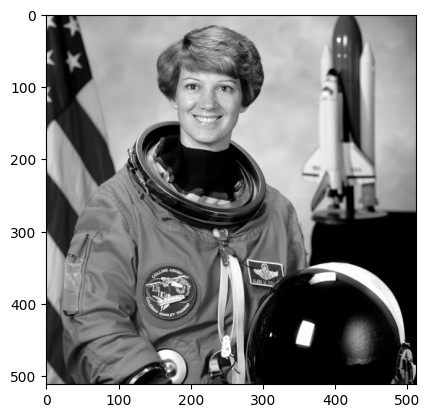

In [28]:
plt.imshow(color.rgb2gray(astro), cmap='gray');

Here we will check if both functions are returning the same result by the Residual Sum of Squares.

$$\text{RSS} = \sum_{i=0}^{m\cdot n} (a_i - b_i)^2$$

In [29]:
def RSS(a, b):
    return sum((a.ravel() - b.ravel())**2)

In [30]:
astro1 = color.rgb2gray(astro)
astro2= my_rgb2gray(astro)
print("RSS(astro1, astro2) = {}".format(RSS(astro1, astro2)))

RSS(astro1, astro2) = 3.458878956115479e-28


## Histograms

Another strategy to check the distance between images is to take advantage of their color intensity distribution on the three channels.

(array([88594., 69119., 48285., 34649., 22665., 14547., 11433.,  8762.,
         5989.,  4691.,  4018.,  3702.,  3420.,  3075.,  3007.,  2925.,
         2894.,  2752.,  2802.,  2791.,  2729.,  2643.,  2625.,  2588.,
         2554.,  2524.,  2486.,  2488.,  2489.,  2327.,  2392.,  2242.,
         2347.,  2304.,  2291.,  2395.,  2351.,  2375.,  2335.,  2369.,
         2387.,  2391.,  2345.,  2499.,  2621.,  4029.,  4244.,  4630.,
        11057.,  9684.,  7333.,  6487.,  6288.,  6240.,  5161.,  5943.,
         7364.,  5617.,  4862.,  7434.,  5987.,  7695.,  8006.,  7864.,
         9237., 11622., 10077.,  9534.,  9492.,  8878.,  9754., 11402.,
         7991., 11658.,  9871., 11574.,  9676., 10092.,  9837.,  9357.,
         9494.,  9107., 10202., 10586., 10296., 11007., 11309., 11927.,
         9077., 10898., 10842., 10208., 10398., 11064.,  9253.,  9019.,
         8687.,  8865.,  8668.,  8885.,  8928.,  8747.,  8798.,  8853.,
         9190.,  9051.,  9612.,  9561.,  9629.,  9659.,  9508., 

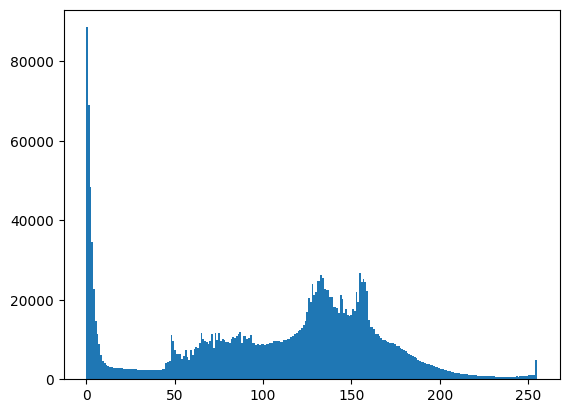

In [59]:
plt.hist(fish.ravel(), bins=256)

In [60]:
R = fish[:,:,0]
G = fish[:,:,1]
B = fish[:,:,2]

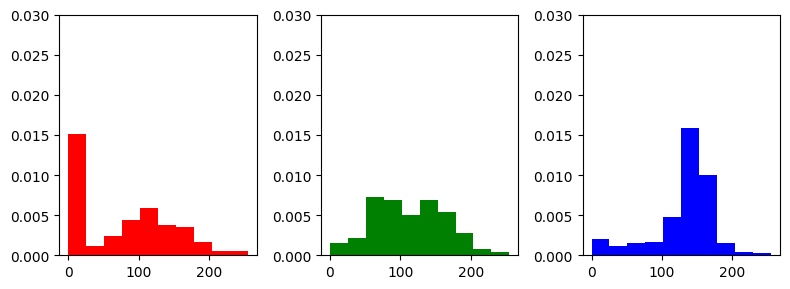

In [61]:
plt.figure(figsize=(8,3))

plt.subplot(1,3,1)
plt.hist(R.ravel(), density=True, color='r');
plt.ylim([0,0.03])


plt.subplot(1,3,2)
plt.hist(G.ravel(), density=True, color='g');
plt.ylim([0,0.03])

plt.subplot(1,3,3)
plt.ylim([0,0.03])
plt.hist(B.ravel(), density=True, color='b');

plt.tight_layout() # a handy command that increases spacing between subplots

From those histograms it looks like the blue channel can be used to discriminate the foreground (a lionfish) from the background, becuase of the distinct peaks. This is gonna be the goal of the next section.

## Background suppression

A <i>binary mask</i> is an simple but effective way to perform a fast background suppression. You can obtain a binary mask in several ways, let's see an example. Create $A$: a simple $3\times 3$ matrix and then print a binary mask corresponding to the positions where its values are bigger than a certain threshold.

In [65]:
A = np.array([[2,2,2], [2,3,2], [2,4,2]])
print(A>2)

[[False False False]
 [False  True False]
 [False  True False]]


perform a simple background suppression identifying two thresholds from the histogram above and then representing the binary mask of the values lying in between them.

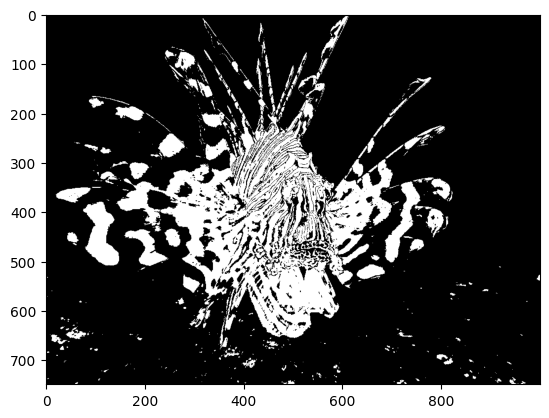

In [66]:
#Performs element-wise logical AND, resulting in True for pixels where blue values are between 100 and 200.

mask = ~np.multiply(B > 100, B < 200)
plt.imshow(mask, cmap='gray');

We may think of improving a bit our mask performing some morphological operations.

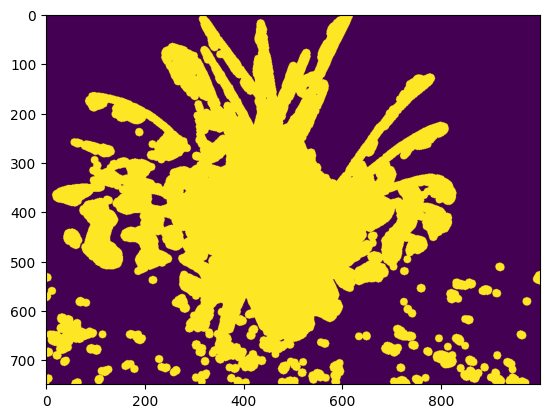

In [67]:
from skimage import morphology

selem = morphology.disk(8)
mask2 = morphology.dilation(mask, selem)

plt.imshow(mask2);

Now we can finally suppress the background in our image.

Hint 1: with <font face="TrueType">numpy</font> arrays you can use <font face="TrueType">bool</font> indexes.

Hint 2: to recompose an image that was previously decomposed in its three channels you can use <font face="TrueType">np.dstack</font>.

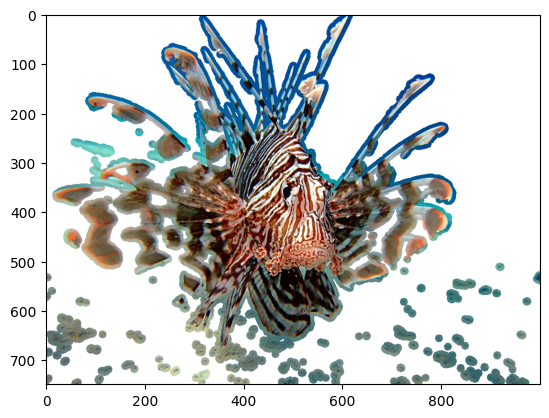

In [71]:
R2 = np.ones_like(R)*255
G2 = np.ones_like(G)*255
B2 = np.ones_like(B)*255

R2[mask2] = R[mask2]
G2[mask2] = G[mask2]
B2[mask2] = B[mask2]

#Combine Channels
fish2 = np.dstack((R2,G2,B2))
plt.imshow(fish2);